In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Creating data set of letters A, B, C using image pixels of how an A looks like highlighting the edges with 1s

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

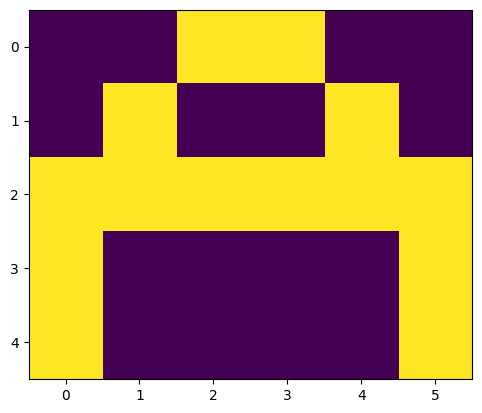

In [9]:
# Visualization the data, plotting A
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [12]:
# converting data and labels into numpy array
x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]

y = np.array(y)

# Print data and labels 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [25]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1 
	a1 = sigmoid(z1)  # out put of layer 2 
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 = a2 - y; #actual d2 should be, but showing bad accuracy: np.multiply((a2 - y), np.multiply(a2, (1 - a2)))
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [26]:
#Initializing weights 
# 30 is input nodes and 5 is out hidden layer nodes
w1 = generate_wt(30, 5)
# 5 is input hidden layer nodes and 3 is final A,B,C nodes
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[-1.14336607  0.69584854 -0.20762512  0.33956562  0.79326731]
 [ 0.46295727 -0.58532588  0.12556609 -1.76844347  2.3168701 ]
 [ 0.66356079  1.54586647  1.5260039   0.98309998  0.24633708]
 [-1.2707617  -1.53254519 -0.4118715  -1.26521341 -1.44543424]
 [-0.35778069 -1.59370172 -1.24631639 -1.44182552  1.09562209]
 [ 1.09973474  1.49923966 -0.94426157 -0.58354306  0.50429455]
 [-0.86531362  1.25412876  1.13246077 -2.807683    0.72480218]
 [-0.37912046 -0.71876468  0.4314765   0.89459648 -1.13451401]
 [-1.04477586  0.15821741  0.14740374  1.90512564 -2.10067201]
 [-0.84611028  0.02472732  0.48630957  0.0266178   1.02586373]
 [-0.57831806 -1.13469934 -1.30563049  0.77954615 -0.02431893]
 [-0.50094874 -0.46626443  1.41383777 -0.87589984  0.82863551]
 [ 0.22980131 -0.44841987 -0.50267416 -1.54619586  0.11338279]
 [ 0.22065431 -0.1699358   0.49256928 -1.29615954  0.60420721]
 [ 1.02942136  0.63394516  1.2257932  -0.76773446  0.82669107]
 [-0.9788026  -0.83423163  0.73535891  0.22455429  0.32

In [27]:
# Training the model
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[] # accuracy within the epoch 
	losss =[] # loss within the epoch
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 64.12395736948488
epochs: 2 ======== acc: 67.97817989645034
epochs: 3 ======== acc: 70.55820339377775
epochs: 4 ======== acc: 72.46996133960755
epochs: 5 ======== acc: 73.95329450694818
epochs: 6 ======== acc: 75.13898580513631
epochs: 7 ======== acc: 76.1106250533353
epochs: 8 ======== acc: 76.92593045336098
epochs: 9 ======== acc: 77.62621724586488
epochs: 10 ======== acc: 78.24145079334164
epochs: 11 ======== acc: 78.79331895606714
epochs: 12 ======== acc: 79.29729090727487
epochs: 13 ======== acc: 79.76411953844442
epochs: 14 ======== acc: 80.20102600555056
epochs: 15 ======== acc: 80.61268281472796
epochs: 16 ======== acc: 81.00203412303702
epochs: 17 ======== acc: 81.37095135016875
epochs: 18 ======== acc: 81.72071603761891
epochs: 19 ======== acc: 82.05233778477997
epochs: 20 ======== acc: 82.36673513954554
epochs: 21 ======== acc: 82.66481857184537
epochs: 22 ======== acc: 82.94751406806706
epochs: 23 ======== acc: 83.21575747257387
epochs: 24 ======== a

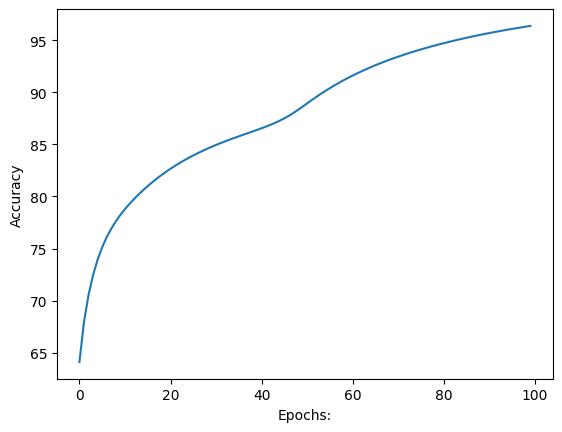

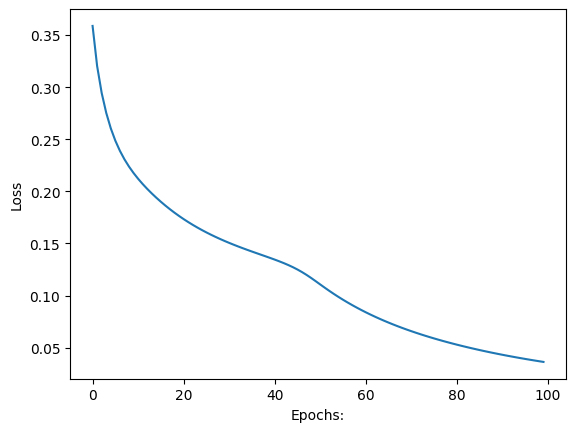

In [28]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter B.


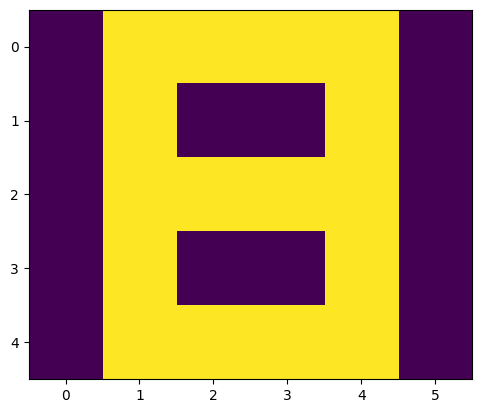

In [29]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter 'B'	
predict(x[1], w1, w2)